# Pattern recognition using SLNNs
### Examples and more

In [1]:
from main import *

#### Add noise

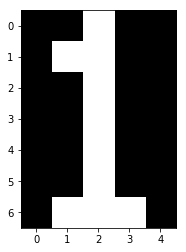

In [2]:
num_show(nums[1])

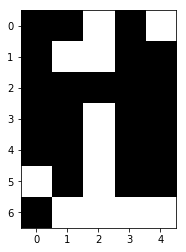

In [3]:
noisy = add_noise(nums[1], 0.10)
num_show(noisy)

#### Generate data

In [4]:
train, test, ytr, yte = gen_data(20202, 10, [1, 2, 3])

In [5]:
ytr

array([[3.],
       [9.],
       [2.],
       [1.],
       [1.],
       [5.],
       [2.],
       [8.],
       [6.],
       [7.]])

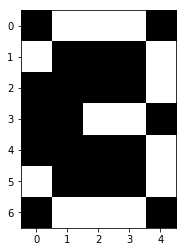

In [6]:
num_show(train[0])

#### Loss functions

In [7]:
wt = np.random.normal(size = 35)
wt = wt[None, :]  # Add a dimension (so we can do matrix operations)
loss(wt, train, ytr)

224.32380596170435

In [8]:
loss(wt, train, ytr, p = 20)  # p is lambda

573.4398115852882